## **Import Required Libraries**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.utils import resample
from sklearn.model_selection import cross_val_score
import seaborn as sn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.cm as cm

<h1>Importing data</h1>

In [2]:
data = pd.read_csv('LandslideData2022_07.dat', delim_whitespace=True)

In [3]:
data.head()

,ID,aspect,strdist,basarea,curvature,curve_cont,curve_prof,drop,rockdist,flowdir,...,elev,cohesion,landslide,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt
0,1,"247,0482","664,8308",65600,"3,020935","-2,463763","0,5571716","37,5",20,16,...,"1061,306",MISSING,MISSING,20,0,MISSING,"11,15498",MISSING,MISSING,MISSING
1,2,"253,3718","642,8063",65600,"-1,277527","0,5579144","-0,7196125",15,20,16,...,"1051,781",MISSING,MISSING,40,0,MISSING,"13,4683","2033,702",1,MISSING
2,3,"265,2971","644,9806",65600,"-2,156464","0,6360565","-1,520407",25,0,16,...,"1057,005",10,1,"28,28427",0,23,"15,3465","2024,026",1,19
3,4,"267,3936","647,7654",65600,"2,61673","-2,301352","0,3153775",40,0,16,...,"1065,42",10,1,20,0,23,"12,92921","2015,106",1,19
4,5,MISSING,"651,1528",MISSING,MISSING,MISSING,MISSING,MISSING,0,MISSING,...,MISSING,10,1,0,1,23,MISSING,MISSING,1,19


<h1>Data cleaning and assessment</h1>

In [3]:
#removing rows with Missing and NaN values
m=[]
for index, row in data.iterrows():
    if "MISSING" in str(row):
        m.append(index)
data2 = data.drop(m)
data2.dropna()

,ID,aspect,strdist,basarea,curvature,curve_cont,curve_prof,drop,rockdist,flowdir,...,elev,cohesion,landslide,scarpdist,scarps,frictang,slope,slopeleg,woods,specwt
2,3,"265,2971","644,9806",65600,"-2,156464","0,6360565","-1,520407",25,0,16,...,"1057,005",10,1,"28,28427",0,23,"15,3465","2024,026",1,19
3,4,"267,3936","647,7654",65600,"2,61673","-2,301352","0,3153775",40,0,16,...,"1065,42",10,1,20,0,23,"12,92921","2015,106",1,19
6,7,"272,0991","625,14",65600,"0,02902222","-0,07380137","-0,04477916",25,0,16,...,"1058,138",10,1,20,0,23,"16,34302","1985,669",1,19
7,8,"272,9689","628,0128",65600,"-1,793457","0,8819597","-0,9114974",25,0,16,...,"1063,369",10,1,20,0,23,"16,76664","1976,543",1,19
8,9,"261,2346","631,5062",65600,"2,723572","-2,240553","0,4830188","42,5",0,16,...,"1072,22",10,1,20,0,23,"13,31464","1968,201",1,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21003,21004,"263,8647","126,4911",79200,"0,2435608","-0,3615837","-0,1180229",25,0,16,...,"695,0031",20,0,"208,8061",0,25,"7,965611","710,9071",0,23
21004,21005,"276,0418","107,7033",79200,"0,3423462","-0,3581133","-0,01576708",15,0,16,...,"698,3199",20,0,"215,4066",0,25,"4,957828","718,514",0,23
21005,21006,"334,0143","89,44272",79200,"0,4635925","-0,4215645","0,04202805","7,5",0,16,...,"700,1603",20,0,"223,6068",0,25,"2,172016","727,741",0,23
21006,21007,"48,03748","72,11102",301200,"1,137787","-0,8687276","0,2690593","16,66667",0,128,...,"700,3067",20,0,"216,3331",0,25,"5,198856","738,5438",0,23


In [4]:
#For ease of operations I converted dataframe to numpy array
data3=data2.to_numpy()

In [5]:
#Change comma to dot and make string values to float
data3=data2.to_numpy()
for i in range(len(data3)):
    for j in range(21):
        if type(data3[i][j])==str:
            data3[i][j]=float(data3[i][j].replace(',','.'))


In [6]:
#after end of operation I converted the numpy array back to a new a panda dataframe
data4=pd.DataFrame(data=data3,columns=['ID', 'aspect','strdist', 'basarea', 'curvature', 'curve_cont',
       'curve_prof', 'drop', 'rockdist', 'flowdir', 'lith', 'elev', 'cohesion',
       'landslide', 'scarpdist', 'scarps', 'frictang', 'slope', 'slopeleg',
       'woods', 'specwt'])

In [7]:
#make scarps and landslides that have values more than 1 to one.
for i in range(len(data4["scarps"])):
    if data4["scarps"][i]>1:
        data4["scarps"][i]=1
for j in range(len(data4["landslide"])):
    if data4["landslide"][j]>1:
        data4["landslide"][j]=1

In [8]:
#make angular calculation and add it to dataframe
n=[]
for i in data4["aspect"]:
    n.append(np.cos(i*np.pi/180))
data4["angular"]=n

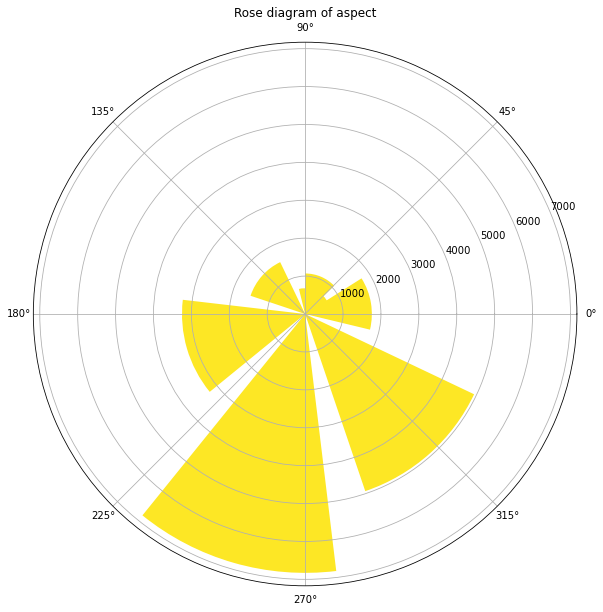

In [47]:
#Rose diagram of aspect
count, bin = np.histogram(data4.aspect, bins=8)
plt.figure(figsize=(10, 10))
plt.axes(polar = True)
plt.bar(bin[:-1], count, align='edge', color=blue)
plt.title("Rose diagram of aspect")
plt.savefig("rose.jpg")

In [9]:
#Changing angular parameter to 1 (North) and 0 (South)
ND=[]
for i in data4["angular"]:
    if i>0:
        ND.append(1)
    else:
        ND.append(0)
data4["northsouth"]=ND

In [10]:
#Chnge wood values more than 1 to 1
woods=[]
for i in data4["woods"]:
    if i>=1:
        woods.append(1)
    else:
        woods.append(0)
data4["woods"]=woods

In [11]:
#Creating a copy of data that does have aspect instead of northsouth value
data4_x=data4.copy()
data4_x=data4_x.drop(['northsouth'],axis=1)

In [12]:
#Removing everything except aspect for data4_x
data4_x=data4_x.drop(['angular'],axis=1)
data4_x=data4_x.drop(['ID'],axis=1)
data4_x=data4_x.drop(['rockdist'],axis=1)
data4_x = data4_x[data4['slope'] < 70]

In [13]:
#Removing columns that do not have importance anymore
data4=data4.drop(['angular'],axis=1)
data4=data4.drop(['aspect'],axis=1)
data4=data4.drop(['ID'],axis=1)
data4=data4.drop(['rockdist'],axis=1)
#Removeing slope values of more than 70 degrees
data4 = data4[data4['slope'] < 70]

(array([16532.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  4180.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

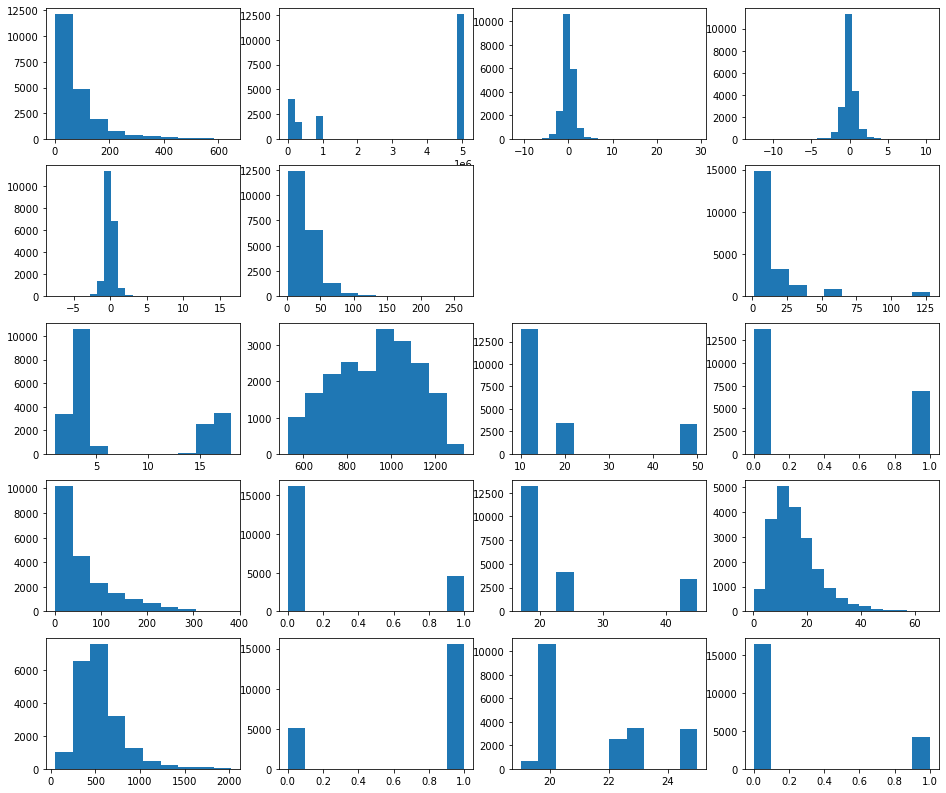

In [16]:
#Plotting Histogram to show distribution of variables
fig, axs = plt.subplots(5, 4,figsize=(16,14))
axs[0][0].hist(data4['strdist'])#ok
axs[0][1].hist(data4['basarea'],bins=25)#Most are above 50000
axs[0][2].hist(data4['curvature'],bins=25)#ok
axs[0][3].hist(data4['curve_cont'],bins=25)#ok

axs[1][0].hist(data4['curve_prof'],bins=25)#ok
axs[1][1].hist(data4['drop'])#ok
#axs[1][2].hist(data4['rockdist'])#ok
axs[1][3].hist(data4['flowdir'])#ok
axs[1][2].remove()

axs[2][0].hist(data4['lith'])#ok
axs[2][1].hist(data4['elev'])#ok
axs[2][2].hist(data4['cohesion']) #ok
axs[2][3].hist(data4['landslide'])#ok

axs[3][0].hist(data4['scarpdist'])#ok
axs[3][1].hist(data4['scarps'])#ok
axs[3][2].hist(data4['frictang'])#ok
axs[3][3].hist(data4['slope'],bins=15)#ok

axs[4][0].hist(data4['slopeleg'])#ok
axs[4][1].hist(data4['woods'])#ok
axs[4][2].hist(data4['specwt'])#ok
axs[4][3].hist(data4['northsouth']) #ok

        



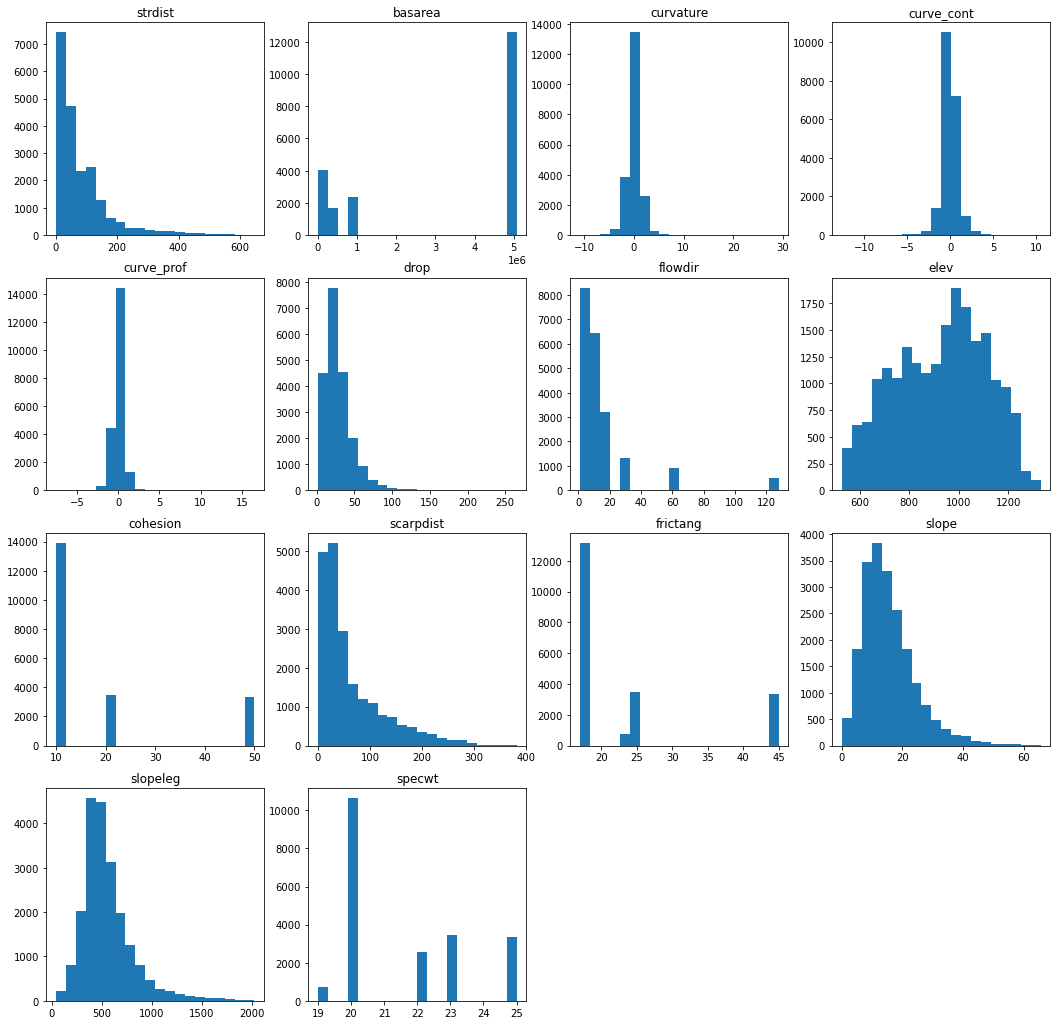

In [17]:
#Plotting histogram of non-categorical variables

m=list(data4.columns) #Make a list of column titles for iteration
m = [e for e in m if e not in ("ID","aspect","rockdist","lith","landslide","scarps","woods","northsouth")] #Remove the columns that are not useful
n=0
fig, axs = plt.subplots(4,4,figsize=(18,18))
for p in range(4):
    for q in range(4):
        if n<14:
            axs[p][q].hist(data4[m[n]],bins=20)
            axs[p][q].title.set_text(m[n])
            n+=1
axs[3][2].remove()
axs[3][3].remove()

In [14]:
#Calculating logarithm of three variables to change their distribution to normal
data4["log(flowdir)"]=np.log10(list(data4["flowdir"].values))
data4["log(slope)"]=np.log10(list(data4["slope"].values))
data4["log(drop)"]=np.log10(list(data4["drop"].values))

In [15]:
#Doing the same things for data4_x
data4_x["log(flowdir)"]=np.log10(list(data4_x["flowdir"].values))
data4_x["log(slope)"]=np.log10(list(data4_x["slope"].values))
data4_x["log(drop)"]=np.log10(list(data4_x["drop"].values))

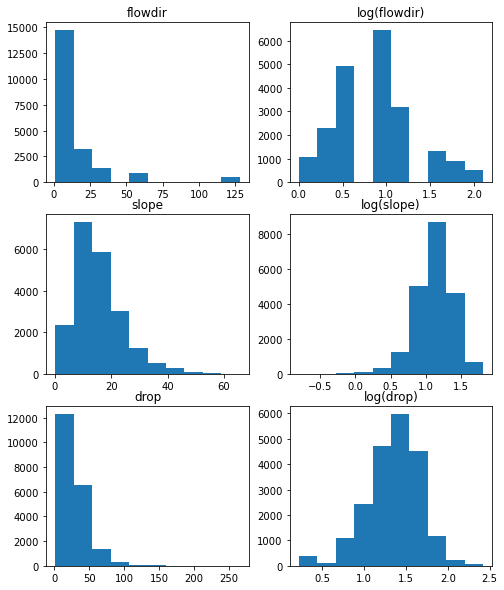

In [16]:
#Sowing changes in distribution of those three variables before and after logathmic calculations
fig, axs = plt.subplots(3, 2,figsize=(8,10))
axs[0][0].hist(data4['flowdir'])
axs[0][0].set_title('flowdir')
axs[0][1].hist(data4['log(flowdir)'])
axs[0][1].set_title('log(flowdir)')
axs[1][0].hist(data4['slope'])
axs[1][0].set_title('slope')
axs[1][1].hist(data4['log(slope)'])
axs[1][1].set_title('log(slope)')
axs[2][0].hist(data4['drop'])
axs[2][0].set_title('drop')
axs[2][1].hist(data4['log(drop)'])
axs[2][1].set_title('log(drop)')
plt.savefig("transformed.jpg")

In [17]:
#Removing the initial columns of drop, slope and flowdir which have a logarithmic new column now
data4=data4.drop(['flowdir'],axis=1)
data4=data4.drop(['slope'],axis=1)
data4=data4.drop(['drop'],axis=1)
data4_x=data4_x.drop(['flowdir'],axis=1)
data4_x=data4_x.drop(['slope'],axis=1)
data4_x=data4_x.drop(['drop'],axis=1)

In [18]:
p=np.cov(data4.astype(float), rowvar=False)
var_cov=pd.DataFrame(data=p,columns=['strdist', 'basarea', 'curvature', 'curve_cont', 'curve_prof', 'lith',
       'elev', 'cohesion', 'landslide', 'scarpdist', 'scarps', 'frictang',
       'slopeleg', 'woods', 'specwt', 'northsouth', 'log(flowdir)',
       'log(slope)', 'log(drop)'],index=['strdist', 'basarea', 'curvature', 'curve_cont', 'curve_prof', 'lith',
       'elev', 'cohesion', 'landslide', 'scarpdist', 'scarps', 'frictang',
       'slopeleg', 'woods', 'specwt', 'northsouth', 'log(flowdir)',
       'log(slope)', 'log(drop)'])

In [33]:
var_cov

,strdist,basarea,curvature,curve_cont,curve_prof,lith,elev,cohesion,landslide,scarpdist,scarps,frictang,slopeleg,woods,specwt,northsouth,log(flowdir),log(slope),log(drop)
strdist,8.295111e+03,-6.886375e+07,8.473759,-3.388012,5.085746,-5.302218e+01,4.807124e+03,5.134402e+02,-13.216652,1.558405e+03,-6.839500,3.718481e+02,1.249862e+04,0.991295,5.857426e+01,8.136775,8.729853,3.935375,5.293803
basarea,-6.886375e+07,5.256401e+12,-26286.136882,-21673.900597,-47960.040053,-3.310747e+06,-2.147713e+07,-1.098871e+07,374165.636760,-4.464845e+07,181288.059573,-7.805885e+06,-2.633517e+08,103947.313059,-1.900369e+06,-142178.824071,-202328.510848,-82407.632692,-89259.312005
curvature,8.473759e+00,-2.628614e+04,2.098800,-1.279347,0.819453,-2.279311e-01,1.206491e+01,2.642495e+00,-0.056373,-1.027761e-01,0.013351,1.749866e+00,2.057921e+00,-0.003715,3.379435e-01,0.036125,0.017698,0.000218,0.175978
curve_cont,-3.388012e+00,-2.167390e+04,-1.279347,0.958438,-0.320909,1.567770e-01,-7.428987e+00,-1.437099e+00,0.022337,8.747466e-01,-0.008578,-9.276575e-01,1.554530e+00,0.000151,-1.838198e-01,-0.012210,-0.008813,0.010935,-0.109553
curve_prof,5.085746e+00,-4.796004e+04,0.819453,-0.320909,0.498544,-7.115418e-02,4.635925e+00,1.205396e+00,-0.034037,7.719706e-01,0.004773,8.222085e-01,3.612450e+00,-0.003564,1.541237e-01,0.023915,0.008885,0.011153,0.066425
lith,-5.302218e+01,-3.310747e+06,-0.227931,0.156777,-0.071154,3.874221e+01,-7.345758e+02,-1.895287e+01,-0.498698,-9.976340e-01,-0.150477,-1.172656e+01,-5.064463e+01,-1.272296,2.811955e+00,-0.131998,0.112750,-0.176652,-0.227542
elev,4.807124e+03,-2.147713e+07,12.064913,-7.428987,4.635925,-7.345758e+02,3.397618e+04,4.712217e+02,-12.997584,1.986432e+03,-6.256695,3.189235e+02,1.235082e+04,24.565519,-3.670620e+01,8.204836,4.532208,1.385811,3.267838
cohesion,5.134402e+02,-1.098871e+07,2.642495,-1.437099,1.205396,-1.895287e+01,4.712217e+02,2.099199e+02,-2.095866,2.622174e+02,-1.084348,1.455005e+02,1.146931e+03,0.909252,2.503199e+01,1.720687,1.746747,0.831846,1.162853
landslide,-1.321665e+01,3.741656e+05,-0.056373,0.022337,-0.034037,-4.986978e-01,-1.299758e+01,-2.095866e+00,0.223238,-1.349001e+01,0.085679,-1.494048e+00,-2.574855e+01,0.050837,-3.482566e-01,-0.019943,-0.019136,0.014983,0.010632
scarpdist,1.558405e+03,-4.464845e+07,-0.102776,0.874747,0.771971,-9.976340e-01,1.986432e+03,2.622174e+02,-13.490007,4.288526e+03,-12.927400,1.774009e+02,3.586361e+03,-3.307985,3.668146e+01,1.810971,2.348804,-1.999740,-2.199573


In [22]:
var_cov.columns

Index(['strdist', 'basarea', 'curvature', 'curve_cont', 'curve_prof', 'lith',
       'elev', 'cohesion', 'landslide', 'scarpdist', 'scarps', 'frictang',
       'slopeleg', 'woods', 'specwt', 'northsouth', 'log(flowdir)',
       'log(slope)', 'log(drop)'],
      dtype='object')

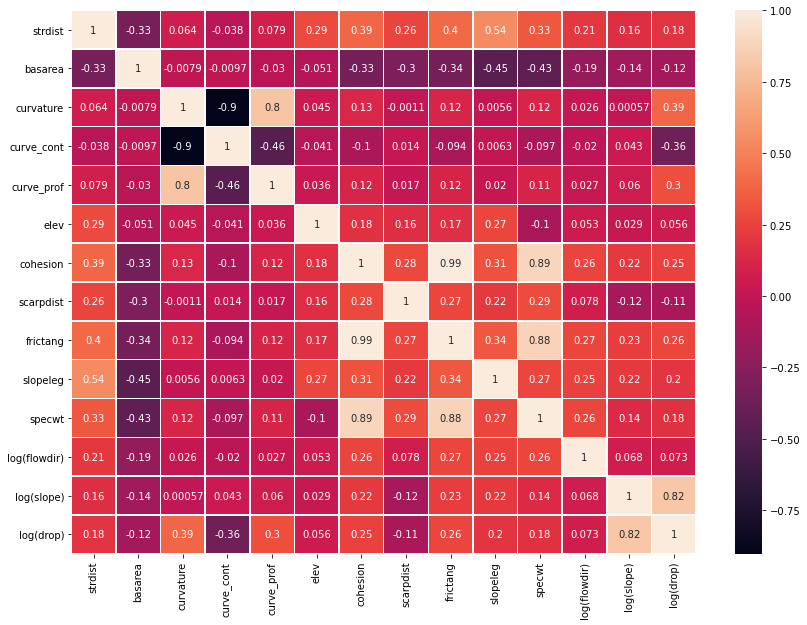

In [19]:
#Plotting Correlation Coefficient Matrix
data_float=data4[['strdist','basarea','curvature','curve_cont','curve_prof','elev','cohesion','scarpdist','frictang','slopeleg','specwt','log(flowdir)','log(slope)','log(drop)']].copy()
m=data_float.to_numpy()
n=np.corrcoef(m.astype(float), rowvar=False)
data_corr2=pd.DataFrame(data=n,columns=['strdist','basarea','curvature','curve_cont','curve_prof','elev','cohesion','scarpdist','frictang','slopeleg','specwt','log(flowdir)','log(slope)','log(drop)'],index=['strdist','basarea','curvature','curve_cont','curve_prof','elev','cohesion','scarpdist','frictang','slopeleg','specwt','log(flowdir)','log(slope)','log(drop)'])
fig, ax = plt.subplots(figsize=(14,10)) 
sn.heatmap(data_corr2, annot= True, linewidths=.5)
plt.savefig("Correlations.jpg")

In [20]:
#Scaling data with Normal Scaler 1
data5=pd.DataFrame()
scaler = StandardScaler()
a=list(data_float.columns)
for i in range(len(a)):
    b=scaler.fit_transform(np.array(data_float[a[i]]).reshape(-1,1))
    data5[a[i]]=b.reshape(-1).tolist()

In [21]:
#Scaling data with Normal Scaler 2
data_float2=data4_x[['strdist','basarea','curvature','curve_cont','curve_prof','elev','cohesion','scarpdist','frictang','slopeleg','specwt','log(flowdir)','log(slope)','log(drop)']].copy()
data5_x=pd.DataFrame()
scaler = StandardScaler()
a2=list(data_float2.columns)
for i in range(len(a2)):
    b2=scaler.fit_transform(np.array(data_float[a2[i]]).reshape(-1,1))
    data5_x[a[i]]=b2.reshape(-1).tolist()
c=list(scaler.fit_transform(np.array(data4_x["aspect"]).reshape(-1,1)).flatten())
data5_x["aspect"]=c

In [22]:
#Removing columns that have higher than 80% correlation coefficient with another one
data6=data5.copy()
losers=['curvature','curve_prof','cohesion','frictang','log(slope)']
for i in range(len(losers)):
    data6 = data6.drop(losers[i], axis=1)

#Adding categorical variables back to dataframe
data6['woods']=data4['woods'].astype('category')
data6['scarps']=data4['scarps'].astype('category')
data6['lith']=data4['lith'].astype('category')
data6['northsouth']=data4['northsouth'].astype('category')
data6['landslide']=data4['landslide'].astype('category')

#Removing remaining Null values
data6.dropna(axis=0, how='any')
#Removing Nan values that didn't get cleared with dropna command
data6.drop([8521,20262], axis=0, inplace=True)

In [23]:
data6_x=data5_x.copy()
losers=['curvature','curve_prof','cohesion','frictang','log(slope)']
for i in range(len(losers)):
    data6_x = data6_x.drop(losers[i], axis=1)
#Adding categorical variables back to dataframe
data6_x['woods']=data4_x['woods'].astype('category')
data6_x['scarps']=data4_x['scarps'].astype('category')
data6_x['lith']=data4_x['lith'].astype('category')
data6_x['landslide']=data4_x['landslide'].astype('category')

#Removing remaining Null values
data6_x.dropna(axis=0, how='any')
#Removing Nan values that didn't get cleared with dropna command
data6_x.drop([8521,20262], axis=0, inplace=True)

<h1>Data Upsampling and Splitting</h1>

In [22]:
#Creating Target dataframe
target_data=data6['landslide'].astype('category')
#Creating Training dataframe
train_data=data6.copy()
train_data=train_data.drop(['landslide'],axis=1)
#Doing the same thing for the dataset with aspect property instead of northsouth
target_data2=data6_x['landslide'].astype('category')
train_data2=data6_x.copy()
train_data2=train_data2.drop(['landslide'],axis=1)

In [23]:
#split data before upsampling with "northsouth" value instead of "aspect"
x_train,x_test,y_train,y_test=train_test_split(train_data,target_data,test_size=0.4,random_state=209)
#split data before upsampling with "aspect" and without "northsouth" value
x_train3,x_test3,y_train3,y_test3=train_test_split(train_data2,target_data2,test_size=0.4,random_state=209)
#Upsampling data
df_majority = data6[data6.landslide==0]
df_minority = data6[data6.landslide==1]
df_minority_upsampled = resample(df_minority, replace=True,n_samples=13743,random_state=123)
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
df_upsampled_data=df_upsampled.copy()
df_upsampled_data.drop(['landslide'],inplace=True,axis=1)
df_upsampled_target=df_upsampled["landslide"]
#Doing the same thing for the data with aspect instead of northsouth
df_majority2 = data6_x[data6_x.landslide==0]
df_minority2 = data6_x[data6_x.landslide==1]
df_minority_upsampled2 = resample(df_minority2, replace=True,n_samples=13743,random_state=123)
df_upsampled2 = pd.concat([df_majority2, df_minority_upsampled2])
df_upsampled_data2=df_upsampled2.copy()
df_upsampled_data2.drop(['landslide'],inplace=True,axis=1)
df_upsampled_target2=df_upsampled2["landslide"]
#split data after upsampling with "northsouth" value instead of "aspect"
x_train2,x_test2,y_train2,y_test2=train_test_split(df_upsampled_data,df_upsampled_target,test_size=0.4,random_state=209)
#split data before upsampling with "aspect" and without "northsouth" value
x_train4,x_test4,y_train4,y_test4=train_test_split(df_upsampled_data2,df_upsampled_target2,test_size=0.4,random_state=209)

<h1>Training SVC algorithm</h1>

In [25]:
#Optimizing hyperparameters
param_grid = {'C':[1,10,100,1000],'gamma':[1,0.1,0.001,0.0001], 'kernel':['rbf']}
grid = GridSearchCV(SVC(),param_grid,refit = True, verbose=0)
grid.fit(df_upsampled_data2,df_upsampled_target2)
grid.best_params_

In [26]:
cls=svm.SVC(kernel="rbf",C=10,gamma=1,probability=True)

In [27]:
#Training SVC algorithm before upsampling with "northsouth" and without "aspect" value
cls.fit(x_train,y_train)
pred_SVC1=cls.predict(x_test)
pred2=cls.predict_proba(x_test)
print("Recall=",metrics.recall_score(y_test,pred_SVC1))
print( "Accuracy=",accuracy_score(y_test, pred_SVC1))

Recall= 0.8479046242774566
Accuracy= 0.9040318686624819


In [28]:
#Training SVC algorithm before upsampling with "aspect" and without "northsouth" value
cls.fit(x_train3,y_train3)
pred_SVC3=cls.predict(x_test3)
pred2_x=cls.predict_proba(x_test3)
print("Recall=",metrics.recall_score(y_test3,pred_SVC3))
print( "Accuracy=",accuracy_score(y_test3, pred_SVC3))

Recall= 0.8385115606936416
Accuracy= 0.9056011588604539


In [29]:
#Training SVC algorithm after upsampling with "northsouth" and without "aspect" value
cls.fit(x_train2,y_train2)
pred_SVC2=cls.predict(x_test2)
print("Recall=",metrics.recall_score(y_test2,pred_SVC2))
print( "Accuracy=",accuracy_score(y_test2, pred_SVC2))

Recall= 0.9547838668837041
Accuracy= 0.9385175079581628


In [30]:
#Training SVC algorithm after upsampling with "aspect" and without "northsouth" value
cls.fit(x_train4,y_train4)
pred_SVC4=cls.predict(x_test4)
pred2_x=cls.predict_proba(x_test4)
print("Recall=",metrics.recall_score(y_test4,pred_SVC4))
print( "Accuracy=",accuracy_score(y_test4, pred_SVC4))

Recall= 0.9609332609875203
Accuracy= 0.9445202364711233


(array([[4888.,  296.,  170.,  137.,   87.,  130.,  110.,  128.,  366.,
         4683.],
        [4683.,  366.,  128.,  110.,  120.,   97.,  137.,  170.,  296.,
         4888.]]),
 array([7.4507436e-12, 1.0000000e-01, 2.0000000e-01, 3.0000000e-01,
        4.0000000e-01, 5.0000000e-01, 6.0000000e-01, 7.0000000e-01,
        8.0000000e-01, 9.0000000e-01, 1.0000000e+00]),
 <a list of 2 BarContainer objects>)

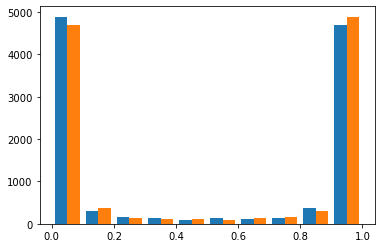

In [31]:
plt.hist(pred2_x)

In [32]:
print(classification_report(y_test2, pred_SVC4))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      5466
         1.0       0.93      0.96      0.95      5529

    accuracy                           0.94     10995
   macro avg       0.95      0.94      0.94     10995
weighted avg       0.94      0.94      0.94     10995



In [33]:
#cross validation aftre upsampling
cv1=cross_val_score(estimator=cls, X=train_data2, y=target_data2, cv=5, n_jobs=4)
print(cv1)
ave_cv_SVC=np.average(cv1)
print("Average score:",ave_cv_SVC)

[0.73128923 0.69048769 0.82713665 0.83872525 0.74167069]
Average score: 0.7658619024625783


In [34]:
#cross validation before upsampling
cv1_2=cross_val_score(estimator=cls, X=train_data, y=target_data, cv=5, n_jobs=4)
print(cv1_2)
ave_cv_SVC2=np.average(cv1_2)
print("Average score:",ave_cv_SVC2)

[0.72597779 0.68252052 0.82279092 0.83920811 0.74287784]
Average score: 0.7626750362143891


<AxesSubplot:>

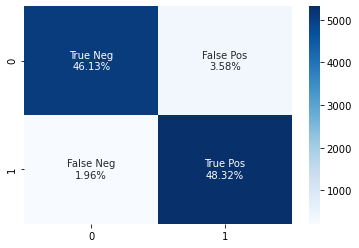

In [35]:
#Calculating and visualizing Confusion Matrix
CM1=confusion_matrix(y_test2, pred_SVC4)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     CM1.flatten()/np.sum(CM1)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(CM1, annot=labels, fmt="", cmap='Blues')

<h1>Training logestic regression algorithm</h1>

In [ ]:
#Optimizing hyperparameters
grid={"C":np.logspace(-3,3,100), "penalty":["l1","l2"]}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,refit = True, verbose=0)
logreg_cv.fit(df_upsampled_data2,df_upsampled_target2)
logreg_cv.best_params_

In [36]:
#Training logestic regression algorithm before upsampling with "northsouth" and without "aspect" value
clf_0 = LogisticRegression(penalty='l2',C=1.873817422860385).fit(x_train, y_train)
pred_LR1 = clf_0.predict(x_test)
print("Recall=",metrics.recall_score(y_test,pred_LR1))
print( "Accuracy=",accuracy_score(pred_LR1, y_test) )

Recall= 0.726878612716763
Accuracy= 0.8318445195557702


In [37]:
#Training logestic regression algorithm before upsampling with "aspect" and without "northsouth" value
clf_0 = LogisticRegression(penalty='l2',C=1.873817422860385).fit(x_train3, y_train3)
pred_LR3 = clf_0.predict(x_test3)
print("Recall=",metrics.recall_score(y_test3,pred_LR3))
print( "Accuracy=",accuracy_score(pred_LR3, y_test3) )

Recall= 0.729407514450867
Accuracy= 0.8309995171414776


In [112]:
#Training logestic regression algorithm after upsampling with "northsouth" and without "aspect" value
clf_3 = LogisticRegression(penalty='l2',C=1.873817422860385).fit(x_train2, y_train2)
pred_LR2 = clf_3.predict(x_test2)
pred2_x2 = clf_3.predict_proba(x_test2)
print("Recall=",metrics.recall_score(y_test2,pred_LR2))
print( "Accuracy=",accuracy_score(pred_LR2, y_test2) )
print( "weights=",clf_3.coef_)

Recall= 0.8457225538071984
Accuracy= 0.8257389722601183
weights= [[-0.75149188  0.32164543  0.0705585  -1.07764084 -1.13551348  0.28785333
  -0.93046427  0.3564013   0.14289748  1.1409248   1.19137041 -0.09735665
  -0.66568905]]


In [39]:
#Training logestic regression algorithm after upsampling with "aspect" and without "northsouth" value
clf_0 = LogisticRegression(penalty='l2',C=1.873817422860385).fit(x_train4, y_train4)
pred_LR4 = clf_0.predict(x_test4)
print("Recall=",metrics.recall_score(y_test4,pred_LR4))
print( "Accuracy=",accuracy_score(pred_LR4, y_test4) )

Recall= 0.8399348887683126
Accuracy= 0.8220100045475216


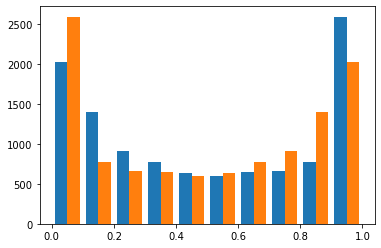

In [132]:
plt.hist(pred2_x2)
plt.savefig("LR-hist.jpg")

In [41]:
print(classification_report(y_test2, pred_LR2))

              precision    recall  f1-score   support

         0.0       0.84      0.81      0.82      5466
         1.0       0.81      0.85      0.83      5529

    accuracy                           0.83     10995
   macro avg       0.83      0.83      0.83     10995
weighted avg       0.83      0.83      0.83     10995



In [42]:
#cross validation
cv2=cross_val_score(estimator=clf_3, X=train_data2, y=target_data2, cv=5, n_jobs=4)
ave_cv_LR=np.average(cv2)
print(cv2)
print("Average score:",ave_cv_LR)

[0.76629648 0.80733945 0.84138098 0.84451956 0.71269918]
Average score: 0.7944471269917914


<AxesSubplot:>

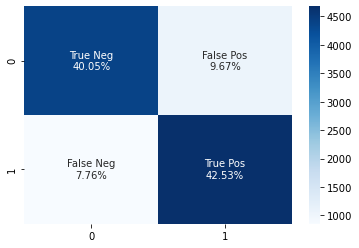

In [43]:
#Calculating and visualizing Confusion Matrix
l=confusion_matrix(y_test2, pred_LR2)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues')

<h1>Training Decision Tree algorithm</h1>

In [86]:
#Optimizing hyperparameters

param_grid={'ccp_alpha': [1e-04,1e-05,1e-06],'criterion': ['gini', 'entropy'],'max_depth': [5, 6, 7, 8, 9],'max_features': ['auto', 'sqrt', 'log2']},
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, verbose=0, cv=3)
grid_search_cv.fit(df_upsampled_data2,df_upsampled_target2)
grid_search_cv.best_params_

{'ccp_alpha': 1e-05,
 'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto'}

In [73]:
clf4 = tree.DecisionTreeClassifier(ccp_alpha= 1e-05,criterion='entropy')
clf4 = clf4.fit(x_train2.to_numpy(), y_train2)

In [82]:
x_train2.columns

Index(['strdist', 'basarea', 'curve_cont', 'elev', 'scarpdist', 'slopeleg',
       'specwt', 'log(flowdir)', 'log(drop)', 'woods', 'scarps', 'lith',
       'northsouth'],
      dtype='object')

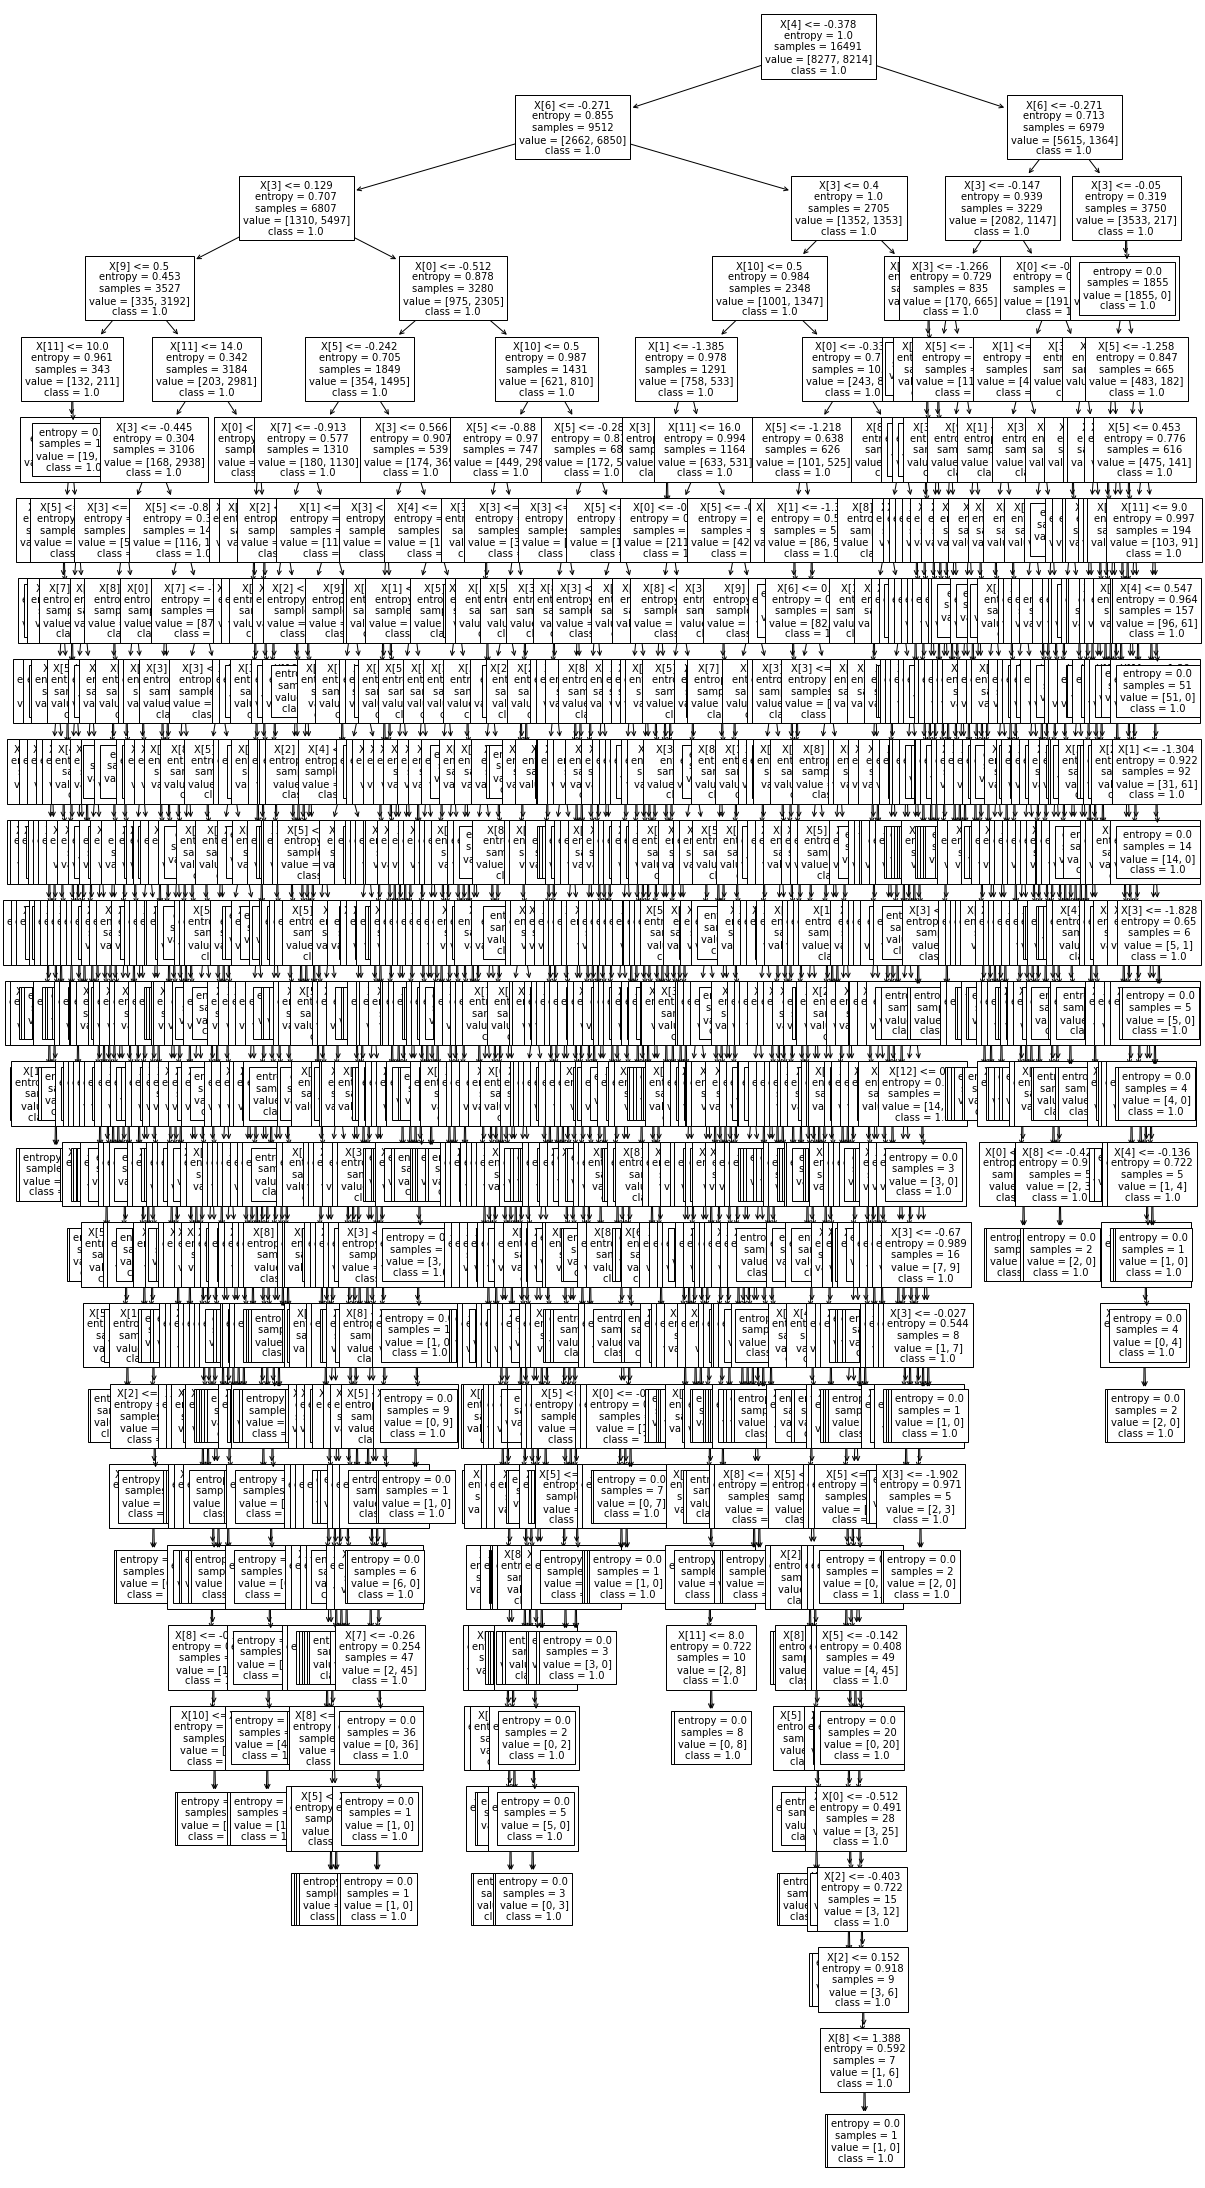

In [81]:
plt.figure(figsize = (20,40))
tree.plot_tree(clf4, class_names = y_train.astype(str),fontsize=10)
plt.savefig("decistion_tree.png")

In [45]:
#Training Decision Tree algorithm before upsampling with "northsouth" and without "aspect" value
clf4 = clf4.fit(x_train.to_numpy(), y_train)
pred_DT1 = clf4.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_DT1))
print("Recall:",metrics.recall_score(y_test, pred_DT1))

Accuracy: 0.8915982617093192
Recall: 0.838150289017341


In [46]:
#Training Decision Tree algorithm before upsampling with "aspect" and without "northsouth" value
clf4 = clf4.fit(x_train3.to_numpy(), y_train3)
pred_DT3 = clf4.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, pred_DT3))
print("Recall:",metrics.recall_score(y_test3, pred_DT3))

Accuracy: 0.8947368421052632
Recall: 0.8460982658959537


In [47]:
#Training Decision Tree algorithm after upsampling with "northsouth" and without "aspect" value
clf4_x = tree.DecisionTreeClassifier(ccp_alpha= 1e-05,criterion = 'entropy')
clf4_x = clf4_x.fit(x_train2.to_numpy(), y_train2)
pred_DT2 = clf4_x.predict(x_test2)
pred2_x3 = clf4_x.predict_proba(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, pred_DT2))
print("Recall:",metrics.recall_score(y_test2, pred_DT2))

Accuracy: 0.9392451114142792
Recall: 0.9593054801953337


In [48]:
#Training Decision Tree algorithm after upsampling with "aspect" and without "northsouth" value
clf4 = tree.DecisionTreeClassifier(ccp_alpha= 1e-05,criterion = 'entropy')
clf4 = clf4.fit(x_train4.to_numpy(), y_train4)
pred_DT4 = clf4.predict(x_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, pred_DT4))
print("Recall:",metrics.recall_score(y_test4, pred_DT4))

Accuracy: 0.9399727148703957
Recall: 0.9632844999095678


(array([[5747.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         5248.],
        [5248.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         5747.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

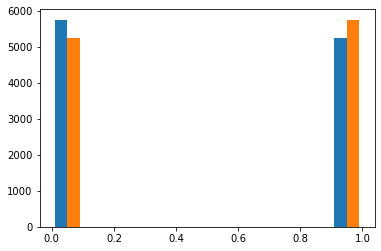

In [49]:
plt.hist(pred2_x3)

In [50]:
print(classification_report(y_test2, pred_DT4))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      5466
         1.0       0.92      0.96      0.94      5529

    accuracy                           0.94     10995
   macro avg       0.94      0.94      0.94     10995
weighted avg       0.94      0.94      0.94     10995



In [51]:
#cross validation
cv3=cross_val_score(estimator=clf4, X=train_data2, y=target_data2, cv=5, n_jobs=4)
print(cv3)
ave_cv_DT=np.average(cv3)
print("Average score:",ave_cv_DT)

[0.69579913 0.55866731 0.78078223 0.80009657 0.69338484]
Average score: 0.7057460164171897


<AxesSubplot:>

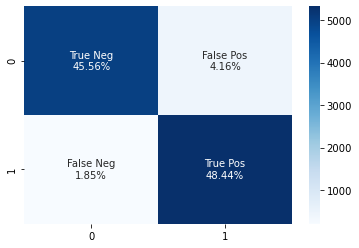

In [52]:
#Calculating and visualizing Confusion Matrix
l=confusion_matrix(y_test2, pred_DT4)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues')

<h1>Training MLP algorithm</h1>

In [120]:
#Optimizing Hyperparameters
parameter_space = {'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],'activation': ['relu'],'solver': ['sgd', 'adam'],'alpha': [1e-3,1e-4,1e-5],'learning_rate': ['constant','adaptive'],}
mlp = MLPClassifier(max_iter=8000)
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=3,verbose=0)
clf.fit(df_upsampled_data2,df_upsampled_target2)
clf.best_params_

{'activation': 'relu',
 'alpha': 1e-05,
 'hidden_layer_sizes': (50, 100, 50),
 'learning_rate': 'adaptive',
 'solver': 'adam'}

In [53]:
mlp = MLPClassifier(hidden_layer_sizes=(50, 100, 50),learning_rate='adaptive', activation='tanh', solver='adam',alpha=1e-5,max_iter=8000,random_state=1)

In [54]:
#Training MLP algorithm before upsampling with "northsouth" and without "aspect" value
mlp.fit(x_train,y_train)
pred_MLP1 = mlp.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_MLP1))
print("Recall:",metrics.recall_score(y_test, pred_MLP1))

Accuracy: 0.9074118783196523
Recall: 0.8858381502890174


In [55]:
#Training MLP algorithm before upsampling with "aspect" and without "northsouth" value
mlp.fit(x_train3,y_train3)
pred_MLP3 = mlp.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, pred_MLP3))
print("Recall:",metrics.recall_score(y_test3, pred_MLP3))

Accuracy: 0.9105504587155964
Recall: 0.8796965317919075


In [56]:
#Training MLP algorithm after upsampling with "northsouth" and without "aspect" value
mlp.fit(x_train2,y_train2)
pred_MLP2 = mlp.predict(x_test2)
pred2_x4 = mlp.predict_proba(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, pred_MLP2))
print("Recall:",metrics.recall_score(y_test2, pred_MLP2))

Accuracy: 0.9425193269668031
Recall: 0.9614758545849159


In [57]:
#Training MLP algorithm after upsampling with "aspect" and without "northsouth" value
mlp.fit(x_train4,y_train4)
pred_MLP4 = mlp.predict(x_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, pred_MLP4))
print("Recall:",metrics.recall_score(y_test4, pred_MLP4))

Accuracy: 0.9443383356070941
Recall: 0.962561041779707


(array([[5475.,  107.,   76.,   45.,   32.,   41.,   54.,   47.,   91.,
         5027.],
        [5027.,   91.,   47.,   54.,   41.,   32.,   45.,   76.,  107.,
         5475.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

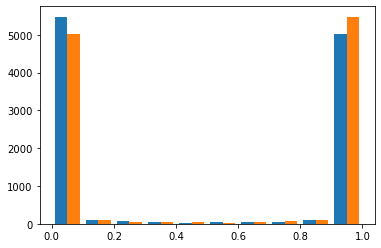

In [58]:
plt.hist(pred2_x4)

In [59]:
print(classification_report(y_test2, pred_MLP4))

              precision    recall  f1-score   support

         0.0       0.96      0.93      0.94      5466
         1.0       0.93      0.96      0.95      5529

    accuracy                           0.94     10995
   macro avg       0.94      0.94      0.94     10995
weighted avg       0.94      0.94      0.94     10995



In [60]:
#cross validation
cv4=cross_val_score(estimator=mlp, X=train_data2, y=target_data2, cv=5, n_jobs=4)
ave_cv_MLP=np.average(cv4)
print(cv4)
print("Average score:",ave_cv_MLP)

[0.69410913 0.61781748 0.81627233 0.80975374 0.77088363]
Average score: 0.7417672621921776


<AxesSubplot:>

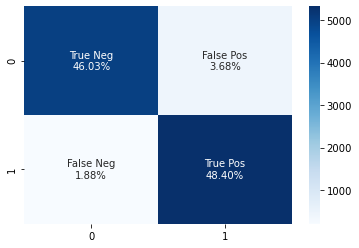

In [61]:
#Calculating and visualizing Confusion Matrix
CM1=confusion_matrix(y_test2, pred_MLP4)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     CM1.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues')

<h1>Training K Nearest Neighbors algorithm</h1>

In [29]:
## Optimizing hyperparameters
knn = KNeighborsClassifier()
param_grid = dict(n_neighbors=list(range(1, 10)))
grid_search_cv = GridSearchCV(knn, param_grid, verbose=0, cv=10)
grid_search_cv.fit(df_upsampled_data,df_upsampled_target)
grid_search_cv.best_params_

{'n_neighbors': 1}

In [62]:
knn = KNeighborsClassifier(n_neighbors=1)

In [63]:
#Training KNN algorithm before upsampling with "northsouth" and without "aspect" value
knn.fit(x_train, y_train)
pred_KNN1 = knn.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_KNN1))
print("Recall:",metrics.recall_score(y_test, pred_KNN1))

Accuracy: 0.8908739739256398
Recall: 0.8446531791907514


In [64]:
#Training KNN algorithm before upsampling with "aspect" and without "northsouth" value
knn.fit(x_train3, y_train3)
pred_KNN3 = knn.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, pred_KNN3))
print("Recall:",metrics.recall_score(y_test3, pred_KNN3))

Accuracy: 0.895219700627716
Recall: 0.8547687861271677


In [65]:
#Training KNN algorithm after upsampling with "northsouth" and without "aspect" value
knn.fit(x_train2, y_train2)
pred_KNN2 = knn.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, pred_KNN2))
print("Recall:",metrics.recall_score(y_test2, pred_KNN2))

Accuracy: 0.9376989540700318
Recall: 0.9598480737927293


In [66]:
#Training KNN algorithm after upsampling with "aspect" and without "northsouth" value
knn.fit(x_train4, y_train4)
pred_KNN4 = knn.predict(x_test4)
pred2_x5=knn.predict_proba(x_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, pred_KNN4))
print("Recall:",metrics.recall_score(y_test4, pred_KNN4))

Accuracy: 0.9374261027739882
Recall: 0.9594863447277989


(array([[5769.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         5226.],
        [5226.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
         5769.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

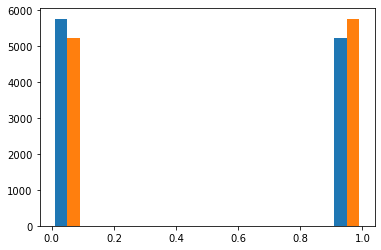

In [67]:
plt.hist(pred2_x5)

In [68]:
print(classification_report(y_test2, pred_KNN4))

              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94      5466
         1.0       0.92      0.96      0.94      5529

    accuracy                           0.94     10995
   macro avg       0.94      0.94      0.94     10995
weighted avg       0.94      0.94      0.94     10995



In [69]:
#cross validation
cv5=cross_val_score(estimator=knn, X=train_data2, y=target_data2, cv=5, n_jobs=4)
ave_cv_KNN=np.average(cv5)
print(cv5)
print("Average score:",ave_cv_KNN)

[0.73949783 0.66393047 0.82761951 0.82641236 0.78295509]
Average score: 0.7680830516658619


<AxesSubplot:>

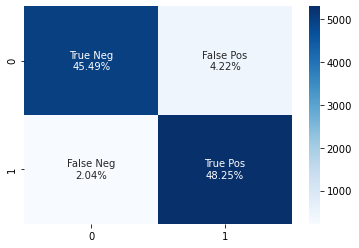

In [70]:
#Calculating and visualizing Confusion Matrix
CM1=confusion_matrix(y_test2, pred_KNN4)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     CM1.flatten()/np.sum(CM1)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(CM1, annot=labels, fmt="", cmap='Blues')

<h1>Training SDG algorithm</h1>

In [ ]:
## Optimizing hyperparameters
grid = {"loss" : ["hinge", "squared_hinge", "modified_huber", "perceptron"],"alpha" : [0.0001, 0.001, 0.01, 0.1],"penalty" : ["l2", "none"]}
grid_search_cv=GridSearchCV(SGDClassifier(max_iter=2000000),grid,refit = True, verbose=0)
grid_search_cv.fit(df_upsampled_data2,df_upsampled_target2)
grid_search_cv.best_params_

In [71]:
clf_SDG = SGDClassifier(loss="modified_huber",alpha=0.01, penalty="l2", max_iter=200000)

In [72]:
#Training SVC algorithm before upsampling with "northsouth" and without "aspect" value
clf_SDG.fit(x_train, y_train)
pred_SDG1=clf_SDG.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_SDG1))
print("Recall:",metrics.recall_score(y_test, pred_SDG1))

Accuracy: 0.8288266537904394
Recall: 0.7536127167630058


In [73]:
#Training SDG algorithm before upsampling with "aspect" and without "northsouth" value
clf_SDG.fit(x_train3, y_train3)
pred_SDG3=clf_SDG.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, pred_SDG3))
print("Recall:",metrics.recall_score(y_test3, pred_SDG3))

Accuracy: 0.8309995171414776
Recall: 0.7630057803468208


In [74]:
#Training SDG algorithm after upsampling with "northsouth" and without "aspect" value
clf_SDG.fit(x_train2, y_train2)
pred_SDG2=clf_SDG.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, pred_SDG2))
print("Recall:",metrics.recall_score(y_test2, pred_SDG2))

Accuracy: 0.8250113688040018
Recall: 0.8844275637547477


In [75]:
#Training SDG algorithm after upsampling with "aspect" and without "northsouth" value
clf_SDG.fit(x_train4, y_train4)
pred_SDG4=clf_SDG.predict(x_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, pred_SDG4))
print("Recall:",metrics.recall_score(y_test4, pred_SDG4))

Accuracy: 0.8262846748522056
Recall: 0.8786398987158618


In [76]:
print(classification_report(y_test2, pred_SDG4))

              precision    recall  f1-score   support

         0.0       0.86      0.77      0.82      5466
         1.0       0.80      0.88      0.84      5529

    accuracy                           0.83     10995
   macro avg       0.83      0.83      0.83     10995
weighted avg       0.83      0.83      0.83     10995



In [77]:
## cross validation
cv6=cross_val_score(estimator=clf_SDG, X=x_train2, y=y_train2, cv=20, n_jobs=4)
ave_cv_SDG=np.average(cv6)
print(cv6)
print("Average score:",ave_cv_SDG)

[0.80848485 0.83757576 0.81090909 0.80848485 0.83272727 0.83030303
 0.81818182 0.82424242 0.83878788 0.83757576 0.80969697 0.7973301
 0.82160194 0.81674757 0.84587379 0.82645631 0.84101942 0.84708738
 0.79975728 0.81553398]
Average score: 0.8234188731979994


<AxesSubplot:>

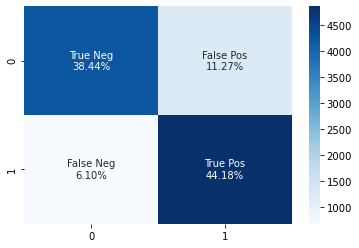

In [78]:
#Calculating and visualizing Confusion Matrix
l=confusion_matrix(y_test2, pred_SDG4)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues')

<h1>Training Gaussian Naive Bayes algorithm</h1>

In [30]:
## Optimizing hyperparameters
grid = {'var_smoothing': np.logspace(0,-9, num=100)}
grid_search_cv=GridSearchCV(GaussianNB(),grid,refit = True, verbose=0)
grid_search_cv.fit(df_upsampled_data2,df_upsampled_target2)
grid_search_cv.best_params_

{'var_smoothing': 1e-06}

In [79]:
gnb = GaussianNB(var_smoothing= 1e-06)

In [80]:
#Training GaussianNB algorithm before upsampling with "northsouth" and without "aspect" value
gnb.fit(x_train, y_train)
pred_GNB1 = gnb.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_GNB1))
print("Recall:",metrics.recall_score(y_test, pred_GNB1))

Accuracy: 0.7818686624818928
Recall: 0.8222543352601156


In [81]:
#Training GaussianNB algorithm before upsampling with "aspect" and without "northsouth" value
gnb.fit(x_train3, y_train3)
pred_GNB3 = gnb.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, pred_GNB3))
print("Recall:",metrics.recall_score(y_test3, pred_GNB3))

Accuracy: 0.7859729599227426
Recall: 0.8273121387283237


In [82]:
#Training GaussianNB algorithm after upsampling with "northsouth" and without "aspect" value
gnb.fit(x_train2, y_train2)
pred_GNB2 = gnb.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, pred_GNB2))
print("Recall:",metrics.recall_score(y_test2, pred_GNB2))

Accuracy: 0.793906321055025
Recall: 0.8477120636643154


In [83]:
#Training GaussianNB algorithm after upsampling with "aspect" and without "northsouth" value
gnb.fit(x_train4, y_train4)
pred_GNB4 = gnb.predict(x_test4)
pred2_x7 = gnb.predict_proba(x_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, pred_GNB4))
print("Recall:",metrics.recall_score(y_test4, pred_GNB4))

Accuracy: 0.7992723965438836
Recall: 0.8538614577681317


(array([[5150.,  391.,  230.,  189.,  160.,  164.,  173.,  228.,  362.,
         3948.],
        [3948.,  362.,  228.,  173.,  164.,  160.,  189.,  230.,  391.,
         5150.]]),
 array([6.18204328e-39, 1.00000000e-01, 2.00000000e-01, 3.00000000e-01,
        4.00000000e-01, 5.00000000e-01, 6.00000000e-01, 7.00000000e-01,
        8.00000000e-01, 9.00000000e-01, 1.00000000e+00]),
 <a list of 2 BarContainer objects>)

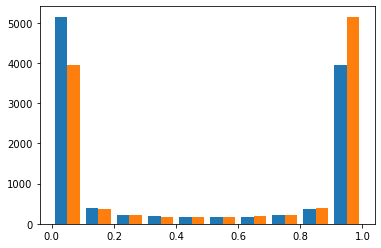

In [84]:
plt.hist(pred2_x7)

In [85]:
print(classification_report(y_test2, pred_GNB4))

              precision    recall  f1-score   support

         0.0       0.83      0.74      0.79      5466
         1.0       0.77      0.85      0.81      5529

    accuracy                           0.80     10995
   macro avg       0.80      0.80      0.80     10995
weighted avg       0.80      0.80      0.80     10995



In [86]:
#cross validation
cv7=cross_val_score(estimator=gnb, X=x_train2, y=y_train2, cv=5, n_jobs=4)
ave_cv_GNB=np.average(cv7)
print(cv7)
print("Average score:",ave_cv_GNB)

[0.79023947 0.80230443 0.79896907 0.79684657 0.79987871]
Average score: 0.797647650729745


<AxesSubplot:>

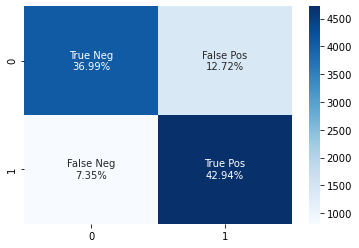

In [124]:
#Calculating and visualizing Confusion Matrix
l=confusion_matrix(y_test2, pred_GNB4)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues')

## Training Randm Forest algorithm

In [101]:
## Optimizing hyperparameters
grid = {'n_estimators': [600, 700,800],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [26,28,30],'criterion' :['gini', 'entropy']}
grid_search_cv=GridSearchCV(RandomForestClassifier(),grid,refit = True, verbose=0)
grid_search_cv.fit(df_upsampled_data2,df_upsampled_target2)
grid_search_cv.best_params_

{'criterion': 'gini',
 'max_depth': 26,
 'max_features': 'sqrt',
 'n_estimators': 800}

In [28]:
clf_RFC = RandomForestClassifier(criterion="gini",max_depth=26,max_features="sqrt",n_estimators=800)

In [111]:
#Training Random Forest algorithm before upsampling with "northsouth" and without "aspect" value
clf_RFC.fit(x_train, y_train)
pred_RF1 = clf_RFC.predict(x_test)
print("Accuracy:",metrics.accuracy_score(y_test, pred_RF1))
print("Recall:",metrics.recall_score(y_test, pred_RF1))

Accuracy: 0.9216562047320135
Recall: 0.9082369942196532


In [110]:
#Training Random Forest algorithm before upsampling with "aspect" and without "northsouth" value
clf_RFC.fit(x_train3, y_train3)
pred_RF3 = clf_RFC.predict(x_test3)
print("Accuracy:",metrics.accuracy_score(y_test3, pred_RF3))
print("Recall:",metrics.recall_score(y_test3, pred_RF3))

Accuracy: 0.9255190729116369
Recall: 0.9111271676300579


In [109]:
#Training Random Forest algorithm after upsampling with "northsouth" and without "aspect" value
clf_RFC.fit(x_train2, y_train2)
pred_RF2 = clf_RFC.predict(x_test2)
print("Accuracy:",metrics.accuracy_score(y_test2, pred_RF2))
print("Recall:",metrics.recall_score(y_test2, pred_RF2))

Accuracy: 0.9518872214643019
Recall: 0.9808283595586905


In [108]:
#Training Random Forest algorithm after upsampling with "aspect" and without "northsouth" value
clf_RFC.fit(x_train4, y_train4)
pred_RF4 = clf_RFC.predict(x_test4)
pred2_x8 = clf_RFC.predict_proba(x_test4)
print("Accuracy:",metrics.accuracy_score(y_test4, pred_RF4))
print("Recall:",metrics.recall_score(y_test4, pred_RF4))

Accuracy: 0.9543428831286949
Recall: 0.9833604630132031


(array([[4109.,  880.,  400.,  260.,  196.,  171.,  226.,  330.,  532.,
         3891.],
        [3885.,  532.,  342.,  220.,  167.,  200.,  263.,  394.,  869.,
         4123.]]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 2 BarContainer objects>)

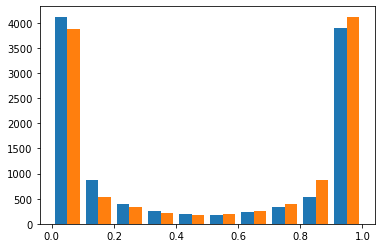

In [92]:
plt.hist(pred2_x8)

In [93]:
print(classification_report(y_test2, pred_RF4))

              precision    recall  f1-score   support

         0.0       0.98      0.93      0.95      5466
         1.0       0.93      0.98      0.96      5529

    accuracy                           0.95     10995
   macro avg       0.96      0.95      0.95     10995
weighted avg       0.96      0.95      0.95     10995



In [94]:
#cross validation
cv8=cross_val_score(estimator=clf_RFC, X=x_train4, y=y_train4, cv=5, n_jobs=4)
ave_cv_RF=np.average(cv8)
print(cv8)
print("Average score:",ave_cv_RF)

[0.94422552 0.94481504 0.94875682 0.94754397 0.94724075]
Average score: 0.9465164205262047


<AxesSubplot:>

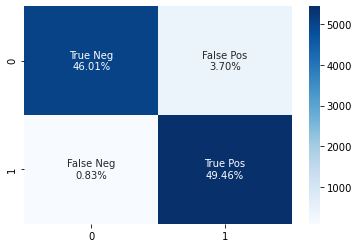

In [95]:
#Calculating and visualizing Confusion Matrix
l=confusion_matrix(y_test4, pred_RF4)
group_names = ["True Neg","False Pos","False Neg","True Pos"]
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues')

In [119]:
report = classification_report(y_test4, pred_SVC4, output_dict=True)
df2 = pd.DataFrame(report).transpose()
list_1=df2.iloc[1:2]
list_1.index=["Support Vector Classification"]
report = classification_report(y_test2, pred_LR2, output_dict=True)
df2 = pd.DataFrame(report).transpose()
list_2=df2.iloc[1:2]
list_2.index=["Logestic Regression"]
report = classification_report(y_test4, pred_DT4, output_dict=True)
df2 = pd.DataFrame(report).transpose()
list_3=df2.iloc[1:2]
list_3.index=["Decision Tree"]
report = classification_report(y_test4, pred_MLP4, output_dict=True)
df2 = pd.DataFrame(report).transpose()
list_4=df2.iloc[1:2]
list_4.index=["Multi-layer Perceptron"]
report = classification_report(y_test4, pred_KNN4, output_dict=True)
df2 = pd.DataFrame(report).transpose()
list_5=df2.iloc[1:2]
list_5.index=["k-nearest neighbors"]
report = classification_report(y_test2, pred_SDG2, output_dict=True)
df2 = pd.DataFrame(report).transpose()
list_6=df2.iloc[1:2]
list_6.index=["Stochastic gradient descent"]
report = classification_report(y_test4, pred_GNB4, output_dict=True)
df2 = pd.DataFrame(report).transpose()
list_7=df2.iloc[1:2]
list_7.index=["Gaussian Naive Bayes"]
report = classification_report(y_test4, pred_RF4, output_dict=True)
df2 = pd.DataFrame(report).transpose()
list_8=df2.iloc[1:2]
list_8.index=["Random Forest"]
report=pd.concat([list_1,list_2,list_3,list_4,list_5,list_6,list_7,list_8])

In [120]:
report

,precision,recall,f1-score,support
Support Vector Classification,0.930962,0.960933,0.945710,5529.0
Logestic Regression,0.814776,0.845723,0.829961,5529.0
Decision Tree,0.920975,0.963284,0.941655,5529.0
Multi-layer Perceptron,0.929282,0.962561,0.945629,5529.0
k-nearest neighbors,0.919570,0.959486,0.939104,5529.0
Stochastic gradient descent,0.791903,0.884428,0.835612,5529.0
Gaussian Naive Bayes,0.771405,0.853861,0.810542,5529.0
Random Forest,0.929879,0.983360,0.955872,5529.0


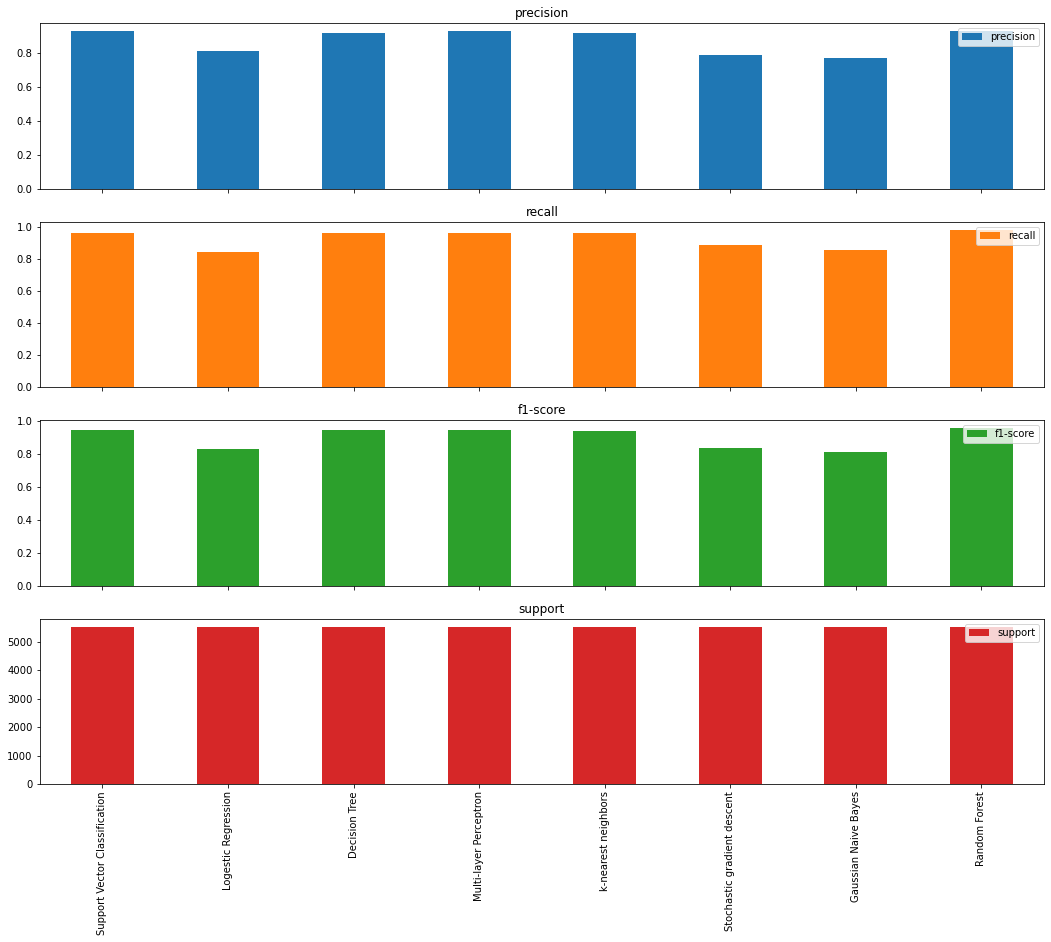

In [121]:
report.plot.bar(rot=90, subplots=True,figsize= (18,14))
plt.savefig("report.jpg")

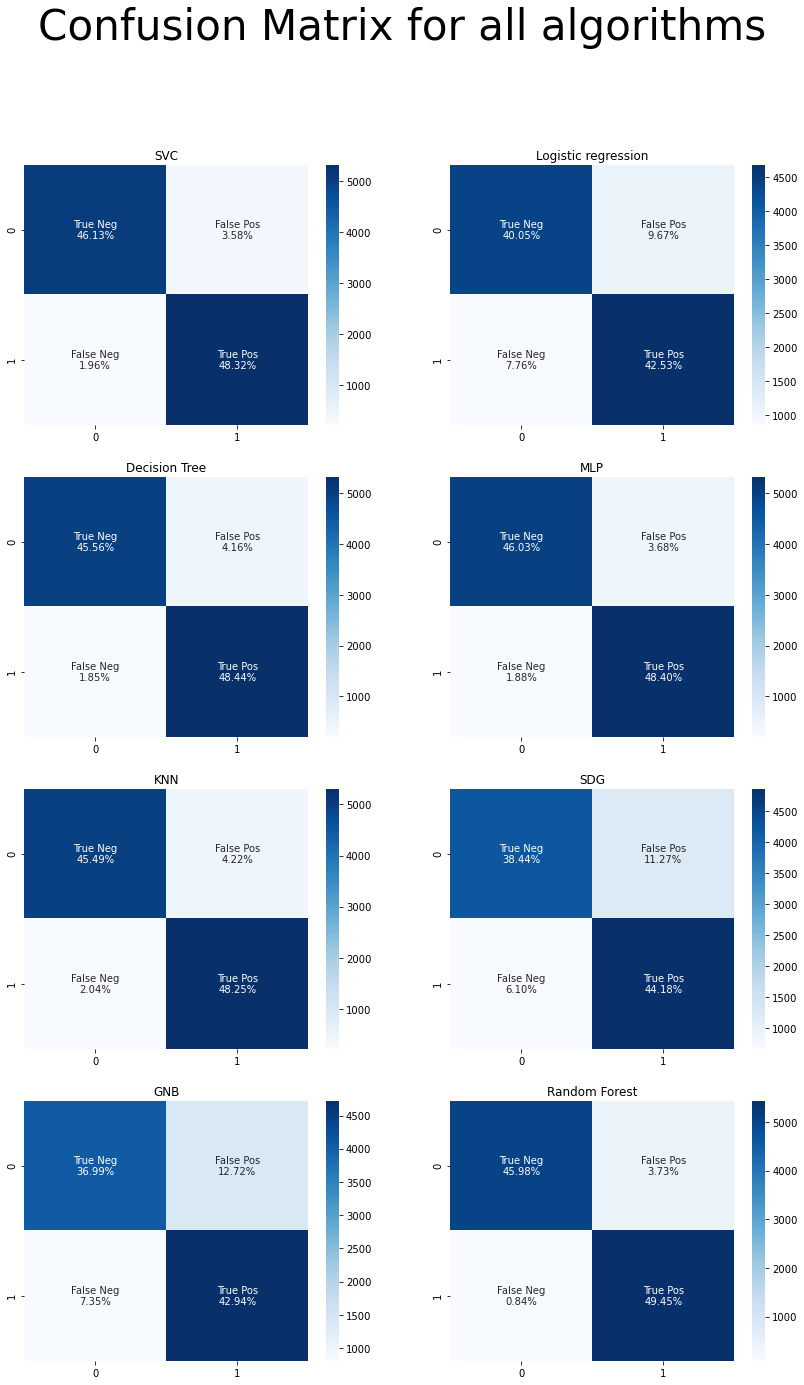

In [131]:
#Creating confusion matrix figure for all methods
group_names = ["True Neg","False Pos","False Neg","True Pos"]
fig, axs = plt.subplots(4, 2,figsize=(14,22))
fig.suptitle("Confusion Matrix for all algorithms", fontsize="42")
CM1=confusion_matrix(y_test2, pred_SVC4)
group_percentages = ["{0:.2%}".format(value) for value in
                    CM1.flatten()/np.sum(CM1)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(CM1, annot=labels, fmt="", cmap='Blues',ax=axs[0, 0])
axs[0,0].set_title('SVC')

l=confusion_matrix(y_test2, pred_LR2)
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues',ax=axs[0, 1])
axs[0,1].set_title('Logistic regression')

#Calculating and visualizing Confusion Matrix
l=confusion_matrix(y_test2, pred_DT4)
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues',ax=axs[1, 0])
axs[1,0].set_title('Decision Tree')

#Calculating and visualizing Confusion Matrix
CM1=confusion_matrix(y_test2, pred_MLP4)
group_percentages = ["{0:.2%}".format(value) for value in
                     CM1.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues',ax=axs[1, 1])
axs[1,1].set_title('MLP')

#Calculating and visualizing Confusion Matrix
CM1=confusion_matrix(y_test2, pred_KNN4)
group_percentages = ["{0:.2%}".format(value) for value in
                     CM1.flatten()/np.sum(CM1)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(CM1, annot=labels, fmt="", cmap='Blues',ax=axs[2, 0])
axs[2,0].set_title('KNN')

#Calculating and visualizing Confusion Matrix
l=confusion_matrix(y_test2, pred_SDG4)
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues',ax=axs[2, 1])
axs[2,1].set_title('SDG')

#Calculating and visualizing Confusion Matrix
l=confusion_matrix(y_test2, pred_GNB4)
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues',ax=axs[3, 0])
axs[3,0].set_title('GNB')

#Calculating and visualizing Confusion Matrix
l=confusion_matrix(y_test4, pred_RF4)
group_percentages = ["{0:.2%}".format(value) for value in
                     l.flatten()/np.sum(l)]
labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sn.heatmap(l, annot=labels, fmt="", cmap='Blues',ax=axs[3, 1])
axs[3,1].set_title('Random Forest')

plt.savefig("confusion matrix.jpg")